In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Describe the data

In [2]:
df_fact = pd.read_csv('./data/all_data.csv', index_col=0)

In [3]:
df_fact

,Datetime,Price_HU,Load_avg_HU,Solar_Fcast_avg_HU,Wind_Onshore_avg_HU,Price_RO,Load_avg_RO,Solar_Fcast_avg_RO,Wind_Onshore_avg_RO,Price_AT,...,Price_2d_RO,Price_7d_RO,Price_2d_AT,Price_7d_AT,is_holiday_HU,is_holiday_RO,is_holiday_AT,is_workday_HU,is_workday_RO,is_workday_AT
0,2019-01-08 00:00:00+00:00,51.40,5069.50,0.0,22.50,181.78,6959.00,0.0,1456.00,42.02,...,236.99,279.00,52.46,33.48,1,1,1,0,0,0
1,2019-01-08 01:00:00+00:00,42.99,4876.25,0.0,31.75,170.46,6874.00,0.0,1397.00,38.06,...,223.69,245.54,49.02,39.76,1,1,1,0,0,0
2,2019-01-08 02:00:00+00:00,41.00,4672.50,0.0,32.00,161.23,6860.00,0.0,1347.00,39.05,...,214.92,169.98,49.01,39.78,1,1,1,0,0,0
3,2019-01-08 03:00:00+00:00,39.76,4583.00,0.0,36.50,185.47,6923.00,0.0,1221.00,22.65,...,199.93,145.52,48.02,27.87,1,1,1,0,0,0
4,2019-01-08 04:00:00+00:00,42.77,4685.75,0.0,49.75,199.50,7133.00,0.0,1048.00,38.05,...,200.61,121.00,48.30,-0.36,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45141,2024-03-24 19:00:00+00:00,85.22,5588.50,0.0,63.25,85.46,6560.25,1.0,1105.25,80.25,...,114.37,87.37,113.47,87.19,1,1,1,0,0,0
45142,2024-03-24 20:00:00+00:00,76.51,5461.00,0.0,65.75,76.65,6317.25,1.0,1016.75,72.20,...,90.34,77.89,88.16,77.89,1,1,1,0,0,0
45143,2024-03-24 21:00:00+00:00,73.74,5193.50,0.0,68.00,73.68,5877.25,1.0,928.25,69.52,...,77.62,72.33,75.46,72.33,1,1,1,0,0,0
45144,2024-03-24 22:00:00+00:00,70.07,4897.25,0.0,71.75,70.10,5498.75,1.0,938.75,67.32,...,75.14,72.10,74.76,72.10,1,1,1,0,0,0


In [4]:
df_fact.columns

Index(['Datetime', 'Price_HU', 'Load_avg_HU', 'Solar_Fcast_avg_HU',
       'Wind_Onshore_avg_HU', 'Price_RO', 'Load_avg_RO', 'Solar_Fcast_avg_RO',
       'Wind_Onshore_avg_RO', 'Price_AT', 'Load_avg_AT', 'Solar_Fcast_avg_AT',
       'Wind_Onshore_avg_AT', 'temperature_2m_BP', 'relative_humidity_2m_BP',
       'pressure_msl_BP', 'surface_pressure_BP', 'precipitation_BP', 'rain_BP',
       'cloud_cover_BP', 'cloud_cover_low_BP', 'cloud_cover_mid_BP',
       'cloud_cover_high_BP', 'shortwave_radiation_BP', 'direct_radiation_BP',
       'diffuse_radiation_BP', 'sunshine_duration_BP', 'wind_speed_10m_BP',
       'wind_speed_100m_BP', 'wind_direction_10m_BP', 'wind_direction_100m_BP',
       'wind_gusts_10m_BP', 'temperature_2m_Konstanca',
       'relative_humidity_2m_Konstanca', 'pressure_msl_Konstanca',
       'surface_pressure_Konstanca', 'precipitation_Konstanca',
       'rain_Konstanca', 'cloud_cover_Konstanca', 'cloud_cover_low_Konstanca',
       'cloud_cover_mid_Konstanca', 'cloud_cov

# Create input df

In [5]:
target_cc = 'HU'
other_county_codes = ['AT', 'RO']

In [6]:
def create_in_df(df_fact, target_cc, other_county_codes):
   df_in = df_fact[[f'Price_{target_cc}', 'Datetime', 'year', 'month', 'day', 'hour', 'weekday',
      'dayoftheweek', 'Datetime-2d', 'Datetime-7d',
      'Price_2d_HU', 'Price_7d_HU', 'Price_2d_RO', 'Price_7d_RO',
      'Price_2d_AT', 'Price_7d_AT', 'is_holiday_HU', 'is_holiday_RO',
      'is_holiday_AT', 'is_workday_HU', 'is_workday_RO', 'is_workday_AT', 
      'Solar_Fcast_avg_HU', 'Wind_Onshore_avg_HU', 'Solar_Fcast_avg_RO',
      'Wind_Onshore_avg_RO', 'Solar_Fcast_avg_AT',
      'Wind_Onshore_avg_AT', 'temperature_2m_BP', 'relative_humidity_2m_BP',
      'pressure_msl_BP', 'surface_pressure_BP', 'precipitation_BP', 'rain_BP',
      'cloud_cover_BP', 'cloud_cover_low_BP', 'cloud_cover_mid_BP',
      'cloud_cover_high_BP', 'shortwave_radiation_BP', 'direct_radiation_BP',
      'diffuse_radiation_BP', 'sunshine_duration_BP', 'wind_speed_10m_BP',
      'wind_speed_100m_BP', 'wind_direction_10m_BP', 'wind_direction_100m_BP',
      'wind_gusts_10m_BP', 'temperature_2m_Konstanca',
      'relative_humidity_2m_Konstanca', 'pressure_msl_Konstanca',
      'surface_pressure_Konstanca', 'precipitation_Konstanca',
      'rain_Konstanca', 'cloud_cover_Konstanca', 'cloud_cover_low_Konstanca',
      'cloud_cover_mid_Konstanca', 'cloud_cover_high_Konstanca',
      'shortwave_radiation_Konstanca', 'direct_radiation_Konstanca',
      'diffuse_radiation_Konstanca', 'sunshine_duration_Konstanca',
      'wind_speed_10m_Konstanca', 'wind_speed_100m_Konstanca',
      'wind_direction_10m_Konstanca', 'wind_direction_100m_Konstanca',
      'wind_gusts_10m_Konstanca',
      f'Load_avg_{target_cc}']]
   
   df_in = df_in.drop(columns=['Datetime-2d', 'Datetime-7d'])

   df_in['Datetime'] = pd.to_datetime(df_in['Datetime'])
   
   return df_in

In [7]:
df_in = create_in_df(df_fact, target_cc, other_county_codes)

In [8]:
#unlimit cols
pd.set_option('display.max_columns', None)

In [9]:
df_in

,Price_HU,Datetime,year,month,day,hour,weekday,dayoftheweek,Price_2d_HU,Price_7d_HU,Price_2d_RO,Price_7d_RO,Price_2d_AT,Price_7d_AT,is_holiday_HU,is_holiday_RO,is_holiday_AT,is_workday_HU,is_workday_RO,is_workday_AT,Solar_Fcast_avg_HU,Wind_Onshore_avg_HU,Solar_Fcast_avg_RO,Wind_Onshore_avg_RO,Solar_Fcast_avg_AT,Wind_Onshore_avg_AT,temperature_2m_BP,relative_humidity_2m_BP,pressure_msl_BP,surface_pressure_BP,precipitation_BP,rain_BP,cloud_cover_BP,cloud_cover_low_BP,cloud_cover_mid_BP,cloud_cover_high_BP,shortwave_radiation_BP,direct_radiation_BP,diffuse_radiation_BP,sunshine_duration_BP,wind_speed_10m_BP,wind_speed_100m_BP,wind_direction_10m_BP,wind_direction_100m_BP,wind_gusts_10m_BP,temperature_2m_Konstanca,relative_humidity_2m_Konstanca,pressure_msl_Konstanca,surface_pressure_Konstanca,precipitation_Konstanca,rain_Konstanca,cloud_cover_Konstanca,cloud_cover_low_Konstanca,cloud_cover_mid_Konstanca,cloud_cover_high_Konstanca,shortwave_radiation_Konstanca,direct_radiation_Konstanca,diffuse_radiation_Konstanca,sunshine_duration_Konstanca,wind_speed_10m_Konstanca,wind_speed_100m_Konstanca,wind_direction_10m_Konstanca,wind_direction_100m_Konstanca,wind_gusts_10m_Konstanca,Load_avg_HU
0,51.40,2019-01-08 00:00:00+00:00,2019,1,8,0,1,1,50.81,59.90,236.99,279.00,52.46,33.48,1,1,1,0,0,0,0.0,22.50,0.0,1456.00,0.0,438.0,-8.129001,87.208970,1026.9,1011.81040,0.0,0.0,67.800000,30.0,68.0,0.0,0.0,0.0,0.0,0.0,7.594208,12.738099,211.42952,222.70937,9.360000,-4.884500,75.288025,1024.3,1016.89690,0.0,0.0,46.200000,17.0,51.0,1.0,0.0,0.0,0.0,0.0,17.068707,28.412645,332.35410,337.65930,34.200000,5069.50
1,42.99,2019-01-08 01:00:00+00:00,2019,1,8,1,1,1,47.95,52.71,223.69,245.54,49.02,39.76,1,1,1,0,0,0,0.0,31.75,0.0,1397.00,0.0,464.0,-7.129000,85.619900,1026.3,1011.27545,0.0,0.0,100.000000,80.0,94.0,0.0,0.0,0.0,0.0,0.0,4.510787,12.768586,208.61037,229.57400,11.159999,-5.434500,76.075905,1024.3,1016.88190,0.0,0.0,74.700005,11.0,89.0,38.0,0.0,0.0,0.0,0.0,17.595861,29.625180,329.23734,334.05774,30.960001,4876.25
2,41.00,2019-01-08 02:00:00+00:00,2019,1,8,2,1,1,46.07,36.49,214.92,169.98,49.01,39.78,1,1,1,0,0,0,0.0,32.00,0.0,1347.00,0.0,490.0,-5.929000,78.102620,1025.6,1010.65260,0.1,0.0,100.000000,75.0,100.0,0.0,0.0,0.0,0.0,0.0,4.379589,8.913181,189.46225,223.36346,12.240000,-5.384500,74.319214,1023.9,1016.48610,0.0,0.0,88.200005,0.0,98.0,98.0,0.0,0.0,0.0,0.0,18.218275,29.469470,330.39563,334.68716,32.760002,4672.50
3,39.76,2019-01-08 03:00:00+00:00,2019,1,8,3,1,1,42.86,31.24,199.93,145.52,48.02,27.87,1,1,1,0,0,0,0.0,36.50,0.0,1221.00,0.0,536.0,-5.579000,77.855380,1024.7,1009.78503,0.2,0.0,100.000000,77.0,99.0,0.0,0.0,0.0,0.0,0.0,5.091168,8.225035,188.13002,203.19861,11.520000,-5.384500,73.450210,1023.3,1015.89040,0.0,0.0,90.900000,4.0,96.0,99.0,0.0,0.0,0.0,0.0,18.218275,28.979440,330.39563,333.43503,33.120000,4583.00
4,42.77,2019-01-08 04:00:00+00:00,2019,1,8,4,1,1,43.01,25.98,200.61,121.00,48.30,-0.36,1,1,1,0,0,0,0.0,49.75,0.0,1048.00,0.0,610.0,-5.429000,78.184370,1023.7,1008.80790,0.2,0.0,100.000000,89.0,89.0,1.0,0.0,0.0,0.0,0.0,5.771239,8.350138,176.42374,187.43132,11.879999,-5.734500,73.962290,1023.1,1015.68230,0.0,0.0,88.200005,0.0,97.0,100.0,0.0,0.0,0.0,0.0,16.375053,28.043050,326.65927,330.80260,32.399998,4685.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45141,85.22,2024-03-24 19:00:00+00:00,2024,3,24,19,6,6,114.84,87.46,114.37,87.37,113.47,87.19,1,1,1,0,0,0,0.0,63.25,1.0,1105.25,0.0,1421.0,5.421000,80.713320,1007.2,993.11400,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.830519,18.079027,251.56496,257.34744,12.959999,10.815499,83.978160,1002.5,995.65356,0.0,0.0,22.200000,0.0,1.0,72.0,0.0,0.0,0.0,0.0,11.304229,26.987997,217.23491,223.91916,20.519999,5588.50
45142,76.51,2024-03-24 20:00:00+00:00,2024,3,24,20,6,6,90.77,77.89,90.34

In [10]:
df_in.isna().sum().sum()

0

# Evaluation metric

In [11]:
def base_eval(y_true, y_pred, do_print=True):
    error = np.mean(abs(y_true - y_pred))
    if do_print:
        print(f'Base evaluation (abs error): {error}')
    return error

In [12]:
def weighted_eval(y_true, y_pred, load, do_print=True):
    error = np.mean(abs((y_true - y_pred)*load))
    if do_print:
        print(f'Weighted evaluation (abs error): {error}')
    return error

# Plot functions

In [13]:
def plot_predictions(y_true, y_pred, model_name, x_ticks=None, x_tick_labels=None):
    plt.figure(figsize=(15, 5))
    plt.plot(y_true, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Datetime')
    plt.ylabel('Price')
    if x_ticks is not None:
        plt.xticks(x_ticks, x_tick_labels)
        plt.xticks(rotation=90)
    plt.title(model_name)
    plt.legend()
    plt.show()

In [14]:
def plot_predictions_by_df(plot_df, model_name):
    plt.figure(figsize=(15, 5))
    plt.plot(plot_df['True'], label='True')
    plt.plot(plot_df['Predicted'], label='Predicted')
    plt.xlabel('Datetime')
    plt.ylabel('Price')

    #xtick only every 12 hours but show datetimes
    x_ticks = np.arange(0, len(plot_df), 12)
    x_tick_labels = plot_df['Datetime'].iloc[x_ticks]
    plt.xticks(x_ticks, x_tick_labels)
    plt.xticks(rotation=90)
    

    plt.title(model_name)
    plt.legend()
    plt.show()
    

In [15]:
def plot_feature_importances(importances):
    importances = dict(importances)
    importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
    plt.figure(figsize=(15, 5))
    plt.bar(importances.keys(), importances.values())
    plt.xticks(rotation=90)
    plt.title('Feature importances')
    plt.show()

In [16]:
def plot_losses(base_loss, weighted_loss):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(base_loss, label='Base loss')
    ax.set_ylabel('Base loss', color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax.twinx()
    ax2.plot(weighted_loss, color='tab:orange', label='Weighted loss')
    ax2.set_ylabel('Weighted loss', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    fig.legend()
    plt.title('Losses')
    plt.show()

In [17]:
def plot_two_importances_change(feature_importances, col_a, col_b):
    imp_a = []
    imp_b = []
    for fi in feature_importances:
        imp_a.append([x[1] for x in fi if x[0] == col_a][0])
        imp_b.append([x[1] for x in fi if x[0] == col_b][0])

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(imp_a, label=col_a)
    ax.set_ylabel(col_a, color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax.twinx()
    ax2.plot(imp_b, color='tab:orange', label=col_b)
    ax2.set_ylabel(col_b, color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.legend()
    plt.title(f'Feature importances of {col_a} and {col_b}')

In [18]:
def get_plot_df_and_ticks(df_in, pred, target_col, n_days, test_period_start):
    x_ticks = np.arange(0, n_days*24)
    x_tick_labels = df_in.loc[df_in['Datetime'] >= test_period_start, 'Datetime'].astype(str).to_list()[-n_days*24:]

    df_plot = pd.DataFrame({'Datetime': df_in.loc[df_in['Datetime'] >= test_period_start, 'Datetime'].to_list()[-n_days*24:], 'True': df_in.loc[df_in['Datetime'] >= test_period_start, target_col].to_list()[-n_days*24:], 'Predicted': pred[-n_days*24:]})
    return (df_plot, x_ticks, x_tick_labels)

In [19]:
def plot_all_importances_change(feature_importances, top_N = 10, base_loss = None):
    #get the top_N features by their max importance
    top_N_features = []
    for fi in feature_importances:
        for i in range(top_N):
            if fi[i][0] not in top_N_features:
                top_N_features.append(fi[i][0])
    
    #plot the change of importance of the top_N features on the same plot
    fig, ax = plt.subplots(figsize=(15, 5))
    for feature in top_N_features:
        imp = []
        for fi in feature_importances:
            imp.append([x[1] for x in fi if x[0] == feature][0])
        ax.plot(imp, label=feature)
    
    #plot the base loss if it is given use other y axis and use black color
    if base_loss is not None:
        ax2 = ax.twinx()
        ax2.plot(base_loss, color='black', label='Base loss', linestyle='--')
        ax2.set_ylabel('Base loss', color='black')
        ax2.tick_params(axis='y', labelcolor='black')
        ax2.legend()

    ax.set_ylabel('Importance')
    ax.tick_params(axis='y')
    ax.legend()
    plt.title('Feature importances change')
    

# Framework

With this framework we can predict the prices for a couple of days and after predicting for a day the model train again with the new data.

In [20]:
from tqdm import tqdm
import xgboost as xgb

In [21]:
test_period_start = pd.to_datetime('2024-01-01 09:00:00+00:00')
test_period_end = df_in.iloc[-1]['Datetime']

In [22]:
target_col = f'Price_{target_cc}'
input_cols = [col for col in df_in.columns if col != target_col and col != 'Datetime' and col != f'Load_avg_{target_cc}']

In [23]:
def do_modeling(model, df, input_cols, target_col):
    model_base_loss = []
    model_weighted_loss = []
    model_pred = []

    feature_importances = []
    

    for date in tqdm(pd.date_range(start=test_period_start, end=test_period_end, freq='D')):
        next_day = date + pd.Timedelta(days=1)

        X_train = df.loc[(df['Datetime'] < date), input_cols]
        y_train = df.loc[(df['Datetime'] < date), target_col]
        X_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), input_cols]
        y_test = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), target_col]

        loads = df.loc[(df['Datetime'] >= date) & (df['Datetime'] < next_day), f'Load_avg_{target_cc}']

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        model_pred.extend(pred)

        model_base_loss.append(base_eval(y_test, pred, do_print=False))
        model_weighted_loss.append(weighted_eval(y_test, pred, loads, do_print=False))
        try:
            fi = zip(X_train.columns, model.feature_importances_)
            #order fi
            fi = sorted(fi, key=lambda x: x[1], reverse=True)
            fi = list(fi)
            feature_importances.append(fi)

        except:
            feature_importances.append(None)
    
    return (model, model_base_loss, model_weighted_loss, model_pred, feature_importances)

# GBR

In [24]:
gbr = xgb.XGBRegressor(random_state=42, tree_method='hist', device='cuda')
output = do_modeling(gbr, df_in, input_cols, target_col)
gbr, gbr_base_loss, gbr_weighted_loss, gbr_pred, gbr_feature_importances = output

  0%|          | 0/84 [00:00<?, ?it/s]d:\Programs\miniconda\envs\pygpu\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
100%|██████████| 84/84 [00:46<00:00,  1.80it/s]


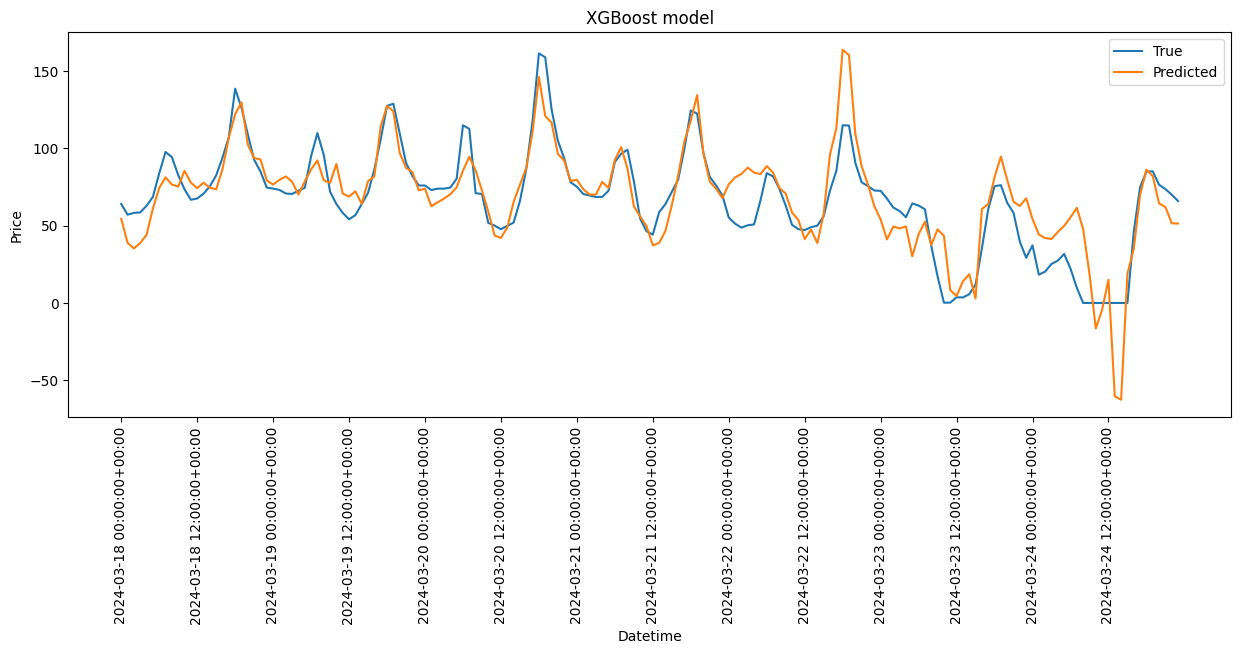

In [25]:
plot_df, xt, xtl = get_plot_df_and_ticks(df_in, gbr_pred, target_col, 7, test_period_start)
plot_predictions_by_df(plot_df, 'XGBoost model')

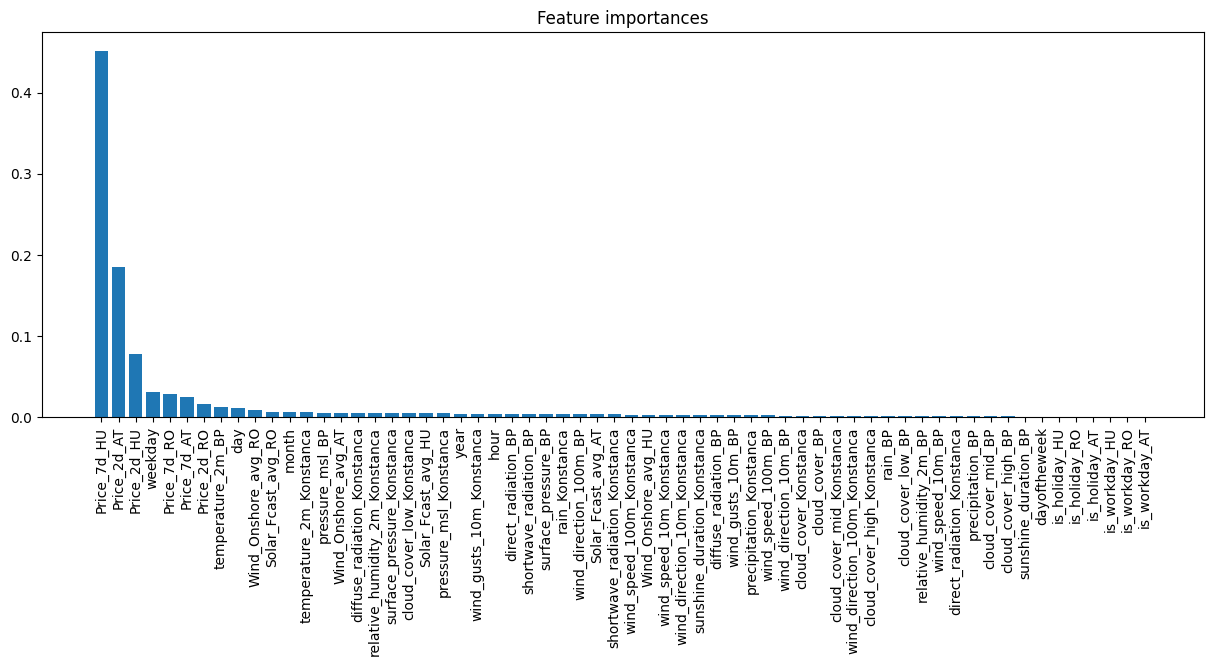

In [26]:
plot_feature_importances(gbr_feature_importances[-1])

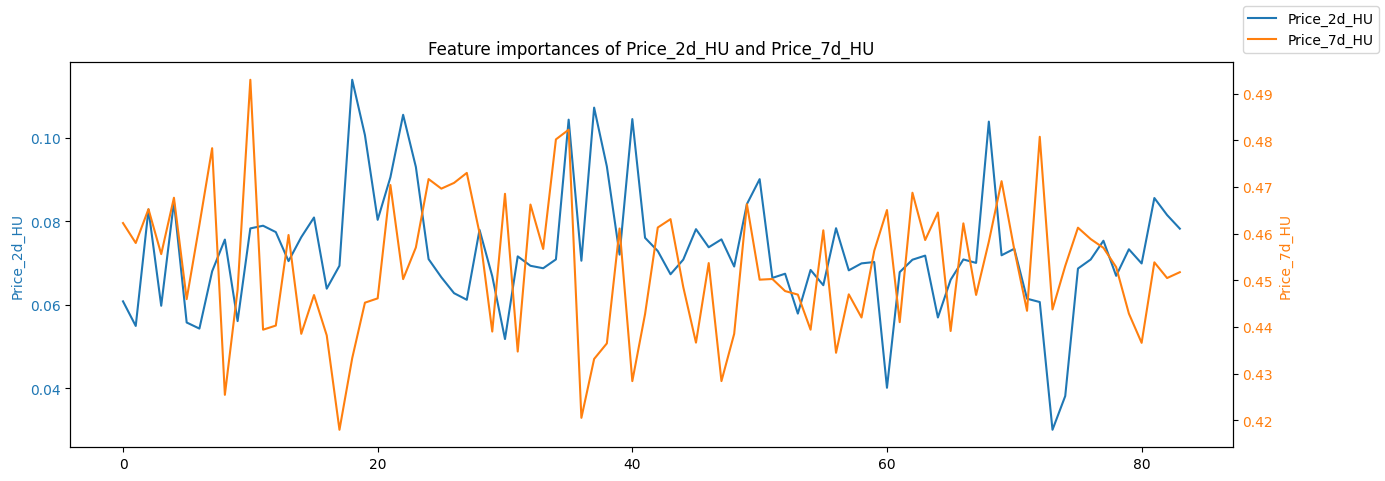

In [27]:
plot_two_importances_change(gbr_feature_importances, 'Price_2d_HU', 'Price_7d_HU')

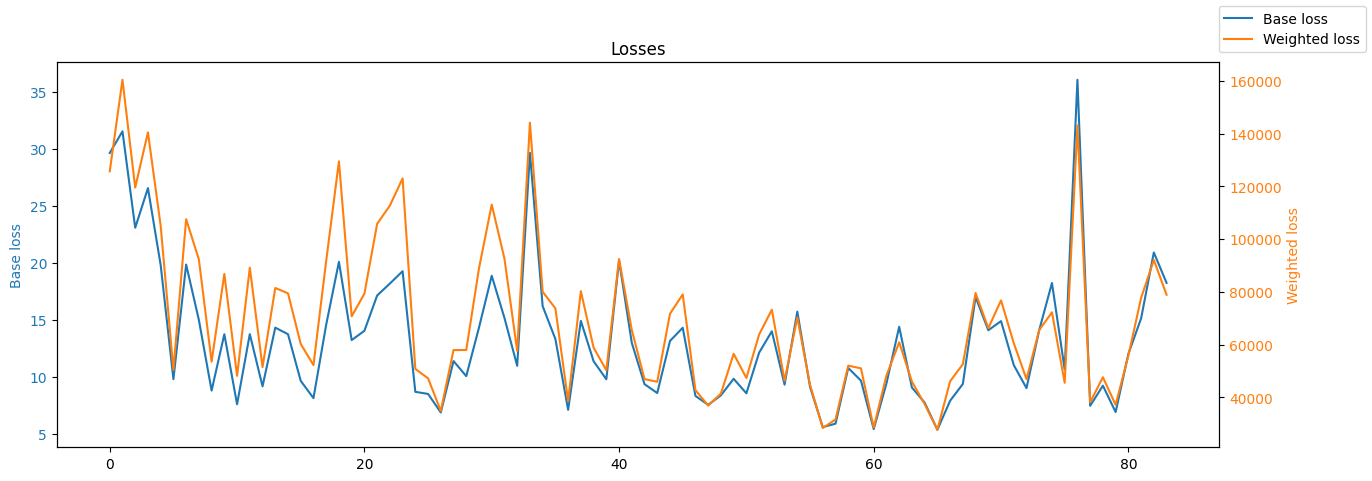

In [28]:
plot_losses(gbr_base_loss, gbr_weighted_loss)

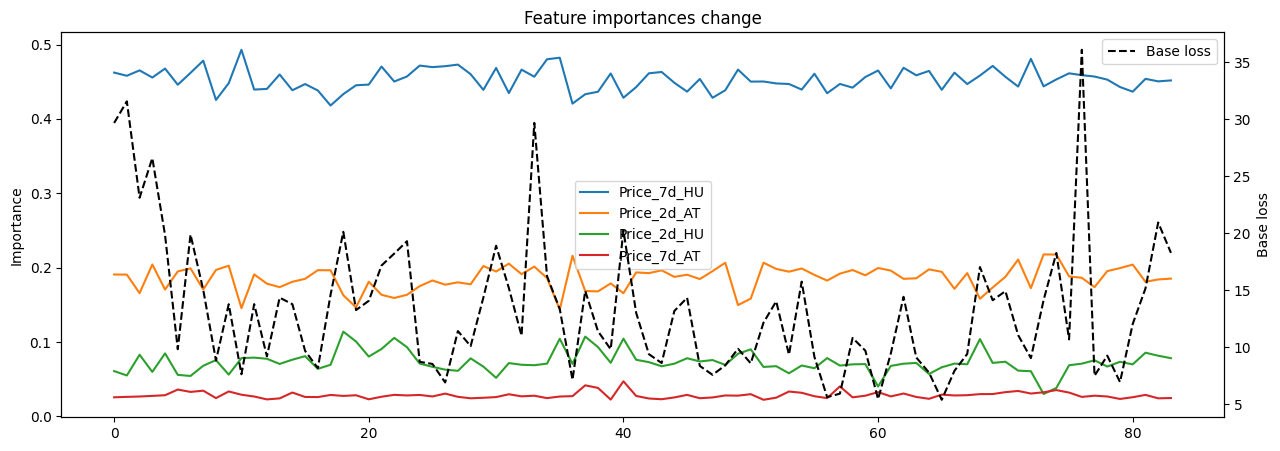

In [29]:
plot_all_importances_change(gbr_feature_importances, 3, gbr_base_loss)

# Decision tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
dtr = DecisionTreeRegressor(random_state=42, max_depth=24)
output = do_modeling(dtr, df_in, input_cols, target_col)
dtr, dtr_base_loss, dtr_weighted_loss, dtr_pred, dtr_feature_importances = output

100%|██████████| 84/84 [04:40<00:00,  3.34s/it]


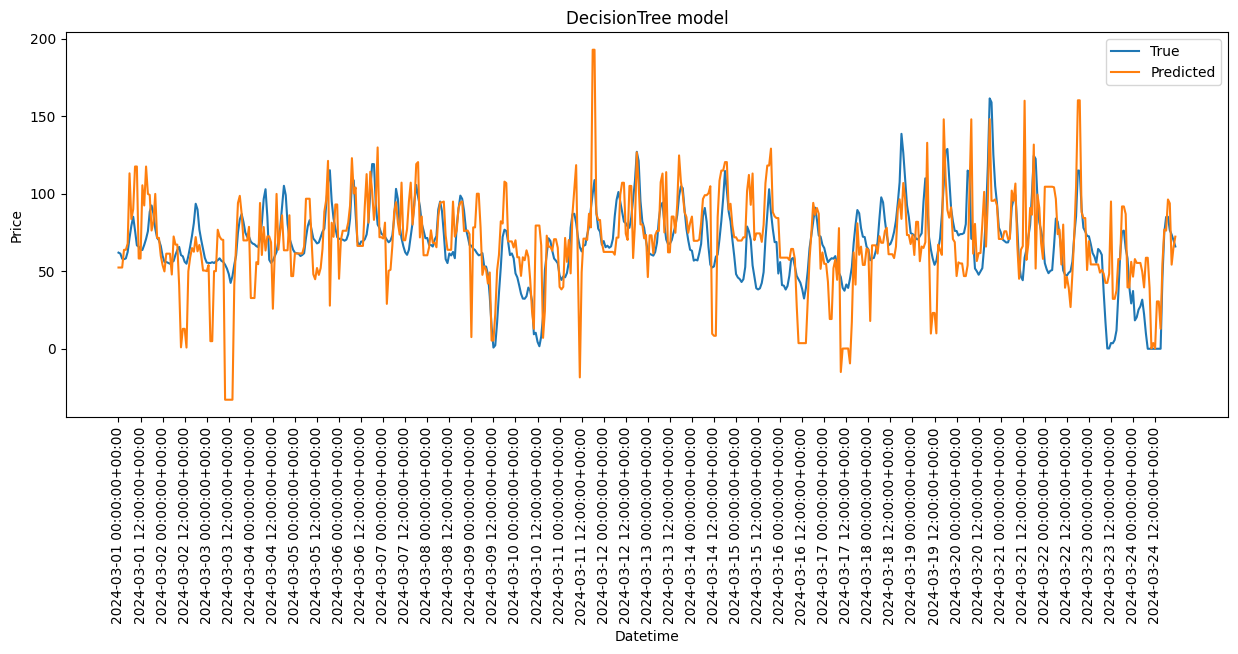

In [32]:
df_plot_dtr, xt_dtr, xtl_dtr = get_plot_df_and_ticks(df_in, dtr_pred, target_col, 24, test_period_start)
plot_predictions_by_df(df_plot_dtr, 'DecisionTree model')

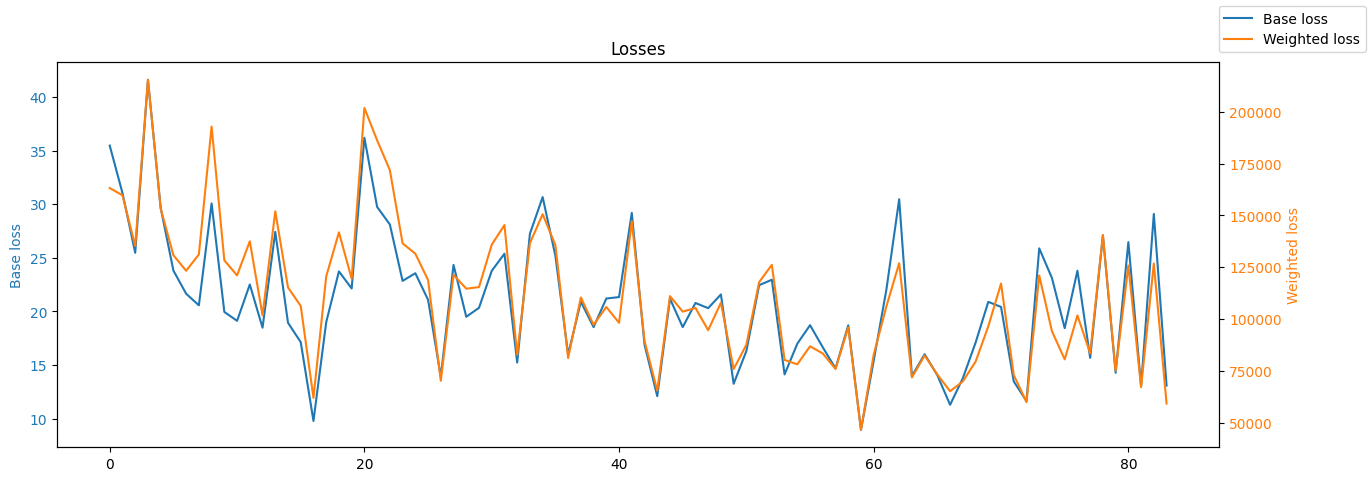

In [33]:
plot_losses(dtr_base_loss, dtr_weighted_loss)